# Elmer the embryo V1

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [4]:
adata = sc.read('/nfs/team298/ar32/Whole_embryo/Outputs/Objects/Post_QC/Norm_log_data_with_scvi_latent_10_batch_size_1024_outs_and_pan_fetal_model_predictions_20220804.h5ad')
obs = pd.read_csv('/nfs/team298/ar32/Whole_embryo/pan_fetal_LR/temp_obs_for_sections.csv', index_col=0)
adata.obs = obs.copy()

In [6]:
# to compare gene expression of 1 celltype of interest / group of interest cut beforehand and then run this 

# Calculate tables to hold potential data to plot

cat1 = 'spatial_location'    # make this the column which the masks relate to i.e. 12 sections
cat2 = 'cell_labels_lvl2'  # change to annotations of interest

adata.obs[cat1] = adata.obs[cat1].astype('category')
adata.obs[cat2] = adata.obs[cat2].astype('category')


# counts table
cat1_len = len(adata.obs[cat1].unique())
cat2_len = len(adata.obs[cat2].unique())
cat1_labels = adata.obs[cat1]
cat2_labels = adata.obs[cat2]
counts_table = pd.crosstab(cat1_labels,cat2_labels)

# percentage_table_row table:
percentage_table_row = counts_table.T
percentage_table_row = (round((percentage_table_row/percentage_table_row.sum())*100,2)).T

# percentage_table_row table:
percentage_table_column = counts_table
percentage_table_column = (round((percentage_table_column/percentage_table_column.sum())*100,2))


In [7]:
# gene expression table: #https://scanpy.discourse.group/t/how-to-calculate-the-average-gene-expression-within-each-cluster/126
gene_expression_table = pd.DataFrame(columns=adata.var_names, index=adata.obs[cat1].cat.categories)                                                                                                 
for clust in adata.obs[cat1].cat.categories:
        gene_expression_table.loc[clust] = adata[adata.obs[cat1].isin([clust]),:].X.mean(0)

# Generate the image

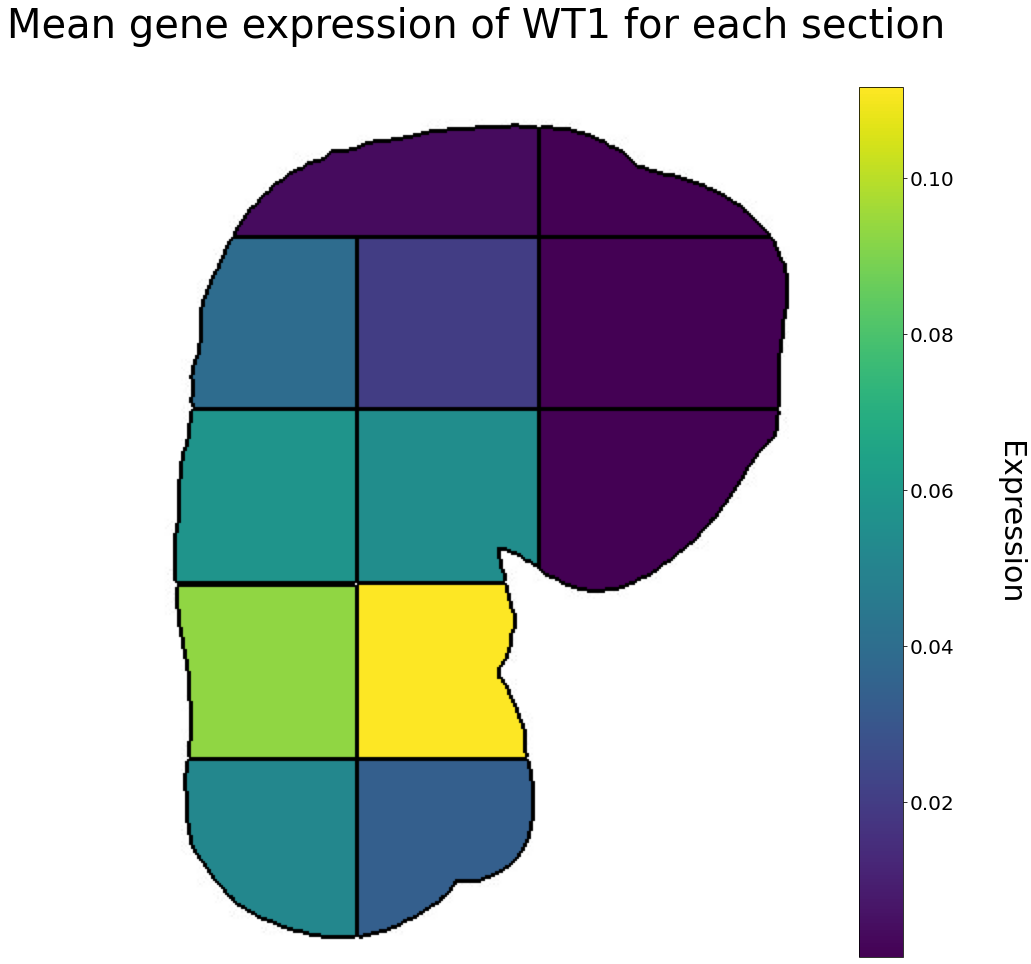

In [9]:
#################################################################################
# Mode arguments:

# manual = manual

# celltype_counts = the total number of cells for specified celltype within a section

# celltype_percentage_within_sections = the percentage of the specified celltype within a section compared against all other celltypes within the same section

# celltype_percentage_across_sections = the percentage of only the specified celltype compared across all sections i.e. the celltypes broad distribution across sections

# gene_expression = average gene expression of a specified gene for a section using all cells within the section. Note: if ran sc.pp.scale then this is average z-scores of the expression values otherwise it is just average expression values



# Mandatory arguments
mode = 'gene_expression'   # manual, celltype_counts, celltype_percentage_within_sections, celltype_percentage_across_sections, gene_expression
cmap = plt.cm.viridis      # using premade colormaps e.g. viridis, plasma, inferno, magma, cividis, Reds
scale = 'auto'             # for the color bar: auto, manual

#################################################################################
# Optional depending on choise of mode

# If chose manual mode - input manual values below
manual_values = [
42,   # Section 1
3,   # Section 2
31,   # Section 3
41,   # Section 4
15,   # Section 5
26,   # Section 6
67,   # Section 7
28,   # Section 8
91,   # Section 9
10,   # Section 10
13,   # Section 11
22,   # Section 12
]


# if chose celltype_counts or celltype_percentage mode
celltype_to_plot = 'MACROPHAGE'

# if chose gene_expression mode
gene_to_plot = 'WT1'   # OR4F5, VCAM1, P2RY12, MLANA, PEML, TYRP1, SHH

# if chose scale manual
scale_lower_value = 0
scale_upper_value = 15

#################################################################################

if mode == 'manual':
    values = manual_values
    
elif mode == 'celltype_counts':
    df_of_values = counts_table[[celltype_to_plot]]
    values = []
    for col in df_of_values:
        value = list(df_of_values[col].values)
        values.extend(value)
    
elif mode == 'celltype_percentage_within_sections':
    df_of_values = percentage_table_row[[celltype_to_plot]]
    values = []
    for col in df_of_values:
        value = list(df_of_values[col].values)
        values.extend(value)

elif mode == 'celltype_percentage_across_sections':
    df_of_values = percentage_table_column[[celltype_to_plot]]
    values = []
    for col in df_of_values:
        value = list(df_of_values[col].values)
        values.extend(value)
        
elif mode == 'gene_expression':
    df_of_values = gene_expression_table[[gene_to_plot]]
    df_of_values = df_of_values.T
    values = []
    for col in df_of_values:
        value = list(df_of_values[col].values)
        values.extend(value)
          
else:
    raise Exception('Mode option not correct. Please use one of the following: manual, celltype_counts, celltype_percentage or gene_expression')
    
# Load in all masks and orignal base image
mask1 = cv2.imread('Mask_section_01.jpg')
mask2 = cv2.imread('Mask_section_02.jpg')
mask3 = cv2.imread('Mask_section_03.jpg')
mask4 = cv2.imread('Mask_section_04.jpg')
mask5 = cv2.imread('Mask_section_05.jpg')
mask6 = cv2.imread('Mask_section_06.jpg')
mask7 = cv2.imread('Mask_section_07.jpg')
mask8 = cv2.imread('Mask_section_08.jpg')
mask9 = cv2.imread('Mask_section_09.jpg')
mask10 = cv2.imread('Mask_section_10.jpg')
mask11 = cv2.imread('Mask_section_11.jpg')
mask12 = cv2.imread('Mask_section_12.jpg')
embryo = cv2.imread('Embryo_mask_sections_outlined_reverse.jpg')
embryo_outline = cv2.imread('Embryo_mask_sections_outlined.jpg')

# Detect borders for masks
embryo_grey = cv2.cvtColor(embryo_outline, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(embryo_grey, 50, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(embryo, contours, -1, (0,0,0), 3) # black
#cv2.drawContours(embryo, contours, -1, (255,255,255), 3) # black

# set threshold for every mask
_, mask1 = cv2.threshold(mask1, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
_, mask2 = cv2.threshold(mask2, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
_, mask3 = cv2.threshold(mask3, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
_, mask4 = cv2.threshold(mask4, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
_, mask5 = cv2.threshold(mask5, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
_, mask6 = cv2.threshold(mask6, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
_, mask7 = cv2.threshold(mask7, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
_, mask8 = cv2.threshold(mask8, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
_, mask9 = cv2.threshold(mask9, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
_, mask10 = cv2.threshold(mask10, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
_, mask11 = cv2.threshold(mask11, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
_, mask12 = cv2.threshold(mask12, thresh=180, maxval=255, type=cv2.THRESH_BINARY)

# create a color scale on the range of values inputted

if scale == 'auto':
    norm = mpl.colors.Normalize( vmin=min(values) , vmax=max(values) )
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    
elif scale == 'manual':
    norm = mpl.colors.Normalize( vmin=scale_lower_value , vmax=scale_upper_value )
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

else:
    raise Exception('Scale option not correct. Please use either auto or manual')
    
# Set the color for each mask 
mask1_color = np.copy(embryo)
mask1_color[(mask1==255).all(-1)] = list(int((255*x)) for x in list(sm.to_rgba(values[0]))[0:3])
mask2_color = np.copy(mask1_color)
mask2_color[(mask2==255).all(-1)] = list(int((255*x)) for x in list(sm.to_rgba(values[1]))[0:3])
mask3_color = np.copy(mask2_color)
mask3_color[(mask3==255).all(-1)] = list(int((255*x)) for x in list(sm.to_rgba(values[2]))[0:3])
mask4_color = np.copy(mask3_color)
mask4_color[(mask4==255).all(-1)] = list(int((255*x)) for x in list(sm.to_rgba(values[3]))[0:3])
mask5_color = np.copy(mask4_color)
mask5_color[(mask5==255).all(-1)] = list(int((255*x)) for x in list(sm.to_rgba(values[4]))[0:3])
mask6_color = np.copy(mask5_color)
mask6_color[(mask6==255).all(-1)] = list(int((255*x)) for x in list(sm.to_rgba(values[5]))[0:3])
mask7_color = np.copy(mask6_color)
mask7_color[(mask7==255).all(-1)] = list(int((255*x)) for x in list(sm.to_rgba(values[6]))[0:3])
mask8_color = np.copy(mask7_color)
mask8_color[(mask8==255).all(-1)] = list(int((255*x)) for x in list(sm.to_rgba(values[7]))[0:3])
mask9_color = np.copy(mask8_color)
mask9_color[(mask9==255).all(-1)] = list(int((255*x)) for x in list(sm.to_rgba(values[8]))[0:3])
mask10_color = np.copy(mask9_color)
mask10_color[(mask10==255).all(-1)] = list(int((255*x)) for x in list(sm.to_rgba(values[9]))[0:3])
mask11_color = np.copy(mask10_color)
mask11_color[(mask11==255).all(-1)] = list(int((255*x)) for x in list(sm.to_rgba(values[10]))[0:3])
mask12_color = np.copy(mask11_color)
mask12_color[(mask12==255).all(-1)] = list(int((255*x)) for x in list(sm.to_rgba(values[11]))[0:3])

# plot the final mask which holds all the other masks and their corresponding colors as well
plt.figure(figsize=(20,16))

plt.imshow(mask12_color)

plt.axis('off')

cb = plt.colorbar(sm)
cb.ax.tick_params(labelsize=20)

if mode == 'manual':
    plt.title('Manual values for every section', fontsize=40, y=1.05)
    cb.set_label("Manual values", fontsize=30, rotation=270, labelpad=70)
    
    
elif mode == 'celltype_counts':
    plt.title(f'Number of counts for celltype {celltype_to_plot}', fontsize=40, y=1.05)

    if scale == 'manual':
        cb.set_label("No. cells" + " (scale values representitive to manual set upper and lower thresholds)", fontsize=20, rotation=270, labelpad=70)
    elif scale == 'auto':
        cb.set_label("No. cells", fontsize=30, rotation=270, labelpad=70)
    
elif mode == 'celltype_percentage_within_sections':
    plt.title(f'Percentage of celltype {celltype_to_plot} compared to other celltypes within section', fontsize=40, y=1.05)
    
    if scale == 'manual':
        cb.set_label("Percentage %" + " (scale values representitive to manual set upper and lower thresholds)", fontsize=20, rotation=270, labelpad=70)
    elif scale == 'auto':
        cb.set_label("Percentage %", fontsize=30, rotation=270, labelpad=70)
    
elif mode == 'celltype_percentage_across_sections':
    plt.title(f'Percentage of  celltype {celltype_to_plot} compared across sections', fontsize=40, y=1.05)
    
    if scale == 'manual':
        cb.set_label("Percentage %" + " (scale values representitive to manual set upper and lower thresholds)", fontsize=20, rotation=270, labelpad=70)
    elif scale == 'auto':
        cb.set_label("Percentage %", fontsize=30, rotation=270, labelpad=70)
        
elif mode == 'gene_expression':
    plt.title(f'Mean gene expression of {gene_to_plot} for each section',fontsize=40, y=1.05)
    
    if scale == 'manual':
        cb.set_label("Expression" + " (scale values representitive to manual set upper and lower thresholds)", fontsize=20, rotation=270, labelpad=70)
    elif scale == 'auto':
        cb.set_label("Expression", fontsize=30, rotation=270, labelpad=70)

#plt.savefig('HO_plot.pdf')